In [1]:
import matplotlib.pyplot as plt
import glob
import re
import numpy as np
import pandas as pd
import librosa
import csv

In [ ]:
for wav_file in glob.glob(r"C:\Users\markn\OneDrive\桌面\Noises\*.wav"):
    y, sr = librosa.load(wav_file)

In [2]:
import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()
plt.rcParams['figure.dpi'] = 100

In [38]:
snd = parselmouth.Sound(r"C:\Users\markn\OneDrive\桌面\Noises\noise-free-sound-0077.wav")


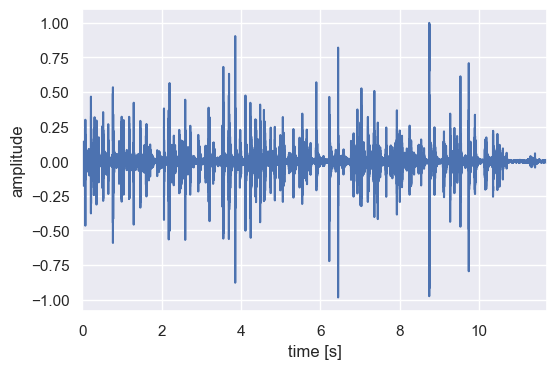

In [39]:
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show()

In [6]:
def draw_spectrogram(spectrogram, dynamic_range=70):    
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

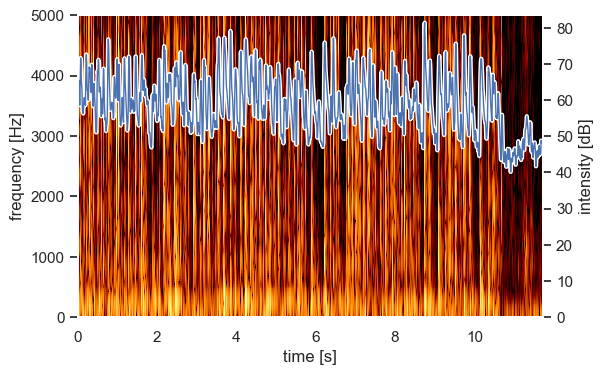

In [40]:

intensity = snd.to_intensity()
spectrogram = snd.to_spectrogram()
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_intensity(intensity)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

In [9]:
def draw_pitch(pitch):    
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

In [15]:
pitch = snd.to_pitch()

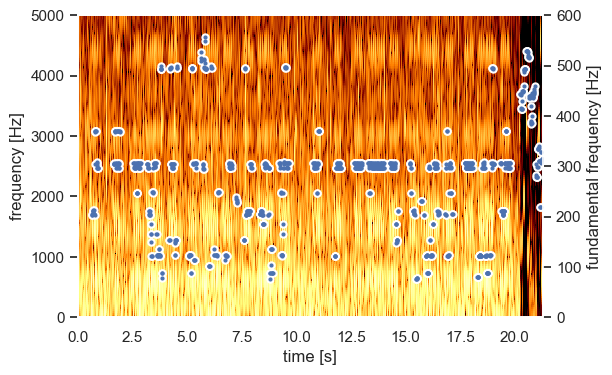

In [16]:
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show()